# LOG Reg Task

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv(r"C:\Users\P nageswararao\OneDrive\Desktop\Algerian_forest_fires_dataset_UPDATE.csv",header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[:122,'Region']=1
df.loc[122:,'Region']=2
df[['Region']] = df[['Region']].astype(int)

In [8]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1


In [9]:
df = df.dropna().reset_index(drop=True) 
df.shape

(244, 15)

In [10]:
df1 = df.drop(122).reset_index(drop=True)
df1.loc[122]

day                     01
month                   06
year                  2012
Temperature             32
 RH                     71
 Ws                     12
Rain                   0.7
FFMC                  57.1
DMC                    2.5
DC                     8.2
ISI                    0.6
BUI                    2.8
FWI                    0.2
Classes        not fire   
Region                   2
Name: 122, dtype: object

Here NaN values contained row was droped

In [11]:
df1.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [12]:
# Spaces were fixed in the column names
df1.columns = df1.columns.str.strip()
df1.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [13]:
df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']] = df1[['month', 'day', 'year', 'Temperature','RH', 'Ws']].astype(int)

In [14]:
objects = [features for features in df1.columns if df1[features].dtypes=='O']
for i in objects:
    if i != 'Classes':
        df1[i] = df1[i].astype(float)

In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [16]:
df1['Classes'].value_counts()

fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: Classes, dtype: int64

In [17]:
df1.Classes = df1.Classes.str.strip()

In [18]:
df1['Classes'].value_counts()

fire        137
not fire    106
Name: Classes, dtype: int64

C:\Users\P nageswararao\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions')

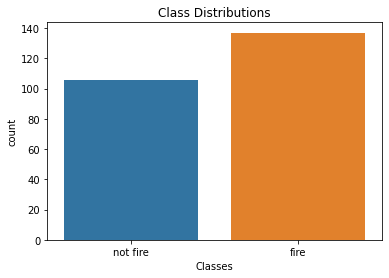

In [19]:
sns.countplot('Classes', data=df1, palette="tab10")
plt.title('Class Distributions')

In [20]:
# Encoding Not fire as 0 and Fire as 1
df1['Classes']= np.where(df1['Classes']== 'not fire',0,1)
df1.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


In [21]:
X = df1.iloc[:, 0:10]
y = df1['Classes']

In [22]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((170, 10), (73, 10))

In [23]:
X_train.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC'],
      dtype='object')

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [26]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
LR = LogisticRegression()

In [29]:
LR.fit(X_train,y_train)

C:\Users\P nageswararao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
print("Training Score:",LR.score(X_train, y_train))
print("Test Score:",LR.score(X_test,y_test))

Training Score: 0.9941176470588236
Test Score: 0.958904109589041


In [31]:
LR_pred = LR.predict(X_test_scaled)
LR_pred

C:\Users\P nageswararao\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [32]:
Actual_predicted = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': LR_pred})    

In [33]:
Actual_predicted.head(10)

,Actual Revenue,Predicted Revenue
110,1,1
150,1,1
37,1,1
75,1,1
109,1,1
71,1,1
122,0,0
73,1,1
154,1,1
234,1,1


In [34]:
from sklearn.metrics import precision_score,r2_score,recall_score,accuracy_score

In [35]:
precision_score(LR_pred,y_test)

1.0

In [36]:
recall_score(LR_pred,y_test)

0.9148936170212766

In [37]:
r2_score(LR_pred,y_test)

0.7610474631751227

In [38]:
accuracy_score(LR_pred,y_test)

0.9452054794520548

## Handling Imbalance data

- Under Sampling

In [39]:
from imblearn.under_sampling import NearMiss
from collections import Counter

In [40]:
NM = NearMiss()

In [41]:
X_res,y_res = NM.fit_resample(X,y)

In [42]:
X_res.shape,y_res.shape

((212, 10), (212,))

In [43]:
print("Original data{}:".format(Counter(y)))
print("Handled data{}".format(Counter(y_res)))

Original dataCounter({1: 137, 0: 106}):
Handled dataCounter({0: 106, 1: 106})


In [44]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.2,random_state=0)

In [45]:
X_train.shape,y_train.shape

((169, 10), (169,))

In [46]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [47]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [48]:
LR1 = LogisticRegression()

In [49]:
LR1.fit(X_train_scaled,y_train)

LogisticRegression()

In [50]:
print("Training Score:",LR.score(X_train, y_train))
print("Test Score:",LR.score(X_test,y_test))

Training Score: 0.9763313609467456
Test Score: 1.0


In [51]:
LR_pred1 = LR.predict(X_test_scaled)
LR_pred1

C:\Users\P nageswararao\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1])

In [52]:
Actual_predicted1 = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': LR_pred1}) 

In [53]:
Actual_predicted1.head(10)

,Actual Revenue,Predicted Revenue
206,1,1
37,0,1
89,0,0
190,1,1
149,1,1
75,0,0
96,0,0
137,1,1
5,0,0
83,0,0


In [54]:
from sklearn.metrics import precision_score,r2_score,recall_score,accuracy_score

In [55]:
print("Precision Score:  {}".format(precision_score(LR_pred1,y_test)))

Precision Score:  1.0


In [56]:
print("Recall score:  {}".format(recall_score(LR_pred1,y_test)))

Recall score:  0.8620689655172413


In [57]:
print("R2_score:   {}".format(r2_score(LR_pred1,y_test)))

R2_score:   0.5763546798029557


In [58]:
print("Accuracy score:  {}".format(accuracy_score(LR_pred1,y_test)))

Accuracy score:  0.9069767441860465


- Over Sampling

In [59]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [60]:
ROS = RandomOverSampler()

In [61]:
X_ros,y_ros = ROS.fit_resample(X,y)

In [62]:
X_ros.shape,y_ros.shape

((274, 10), (274,))

In [63]:
print("Original data:  {}".format(Counter(y)))
print("Handled data:  {}".format(Counter(y_ros)))

Original data:  Counter({1: 137, 0: 106})
Handled data:  Counter({0: 137, 1: 137})


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X_ros,y_ros,test_size=0.2,random_state=50)

In [65]:
def scaler_standard(X_train, X_test):
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled

In [66]:
X_train_scaled, X_test_scaled = scaler_standard(X_train, X_test)

In [67]:
LR1 = LogisticRegression()

In [68]:
LR1.fit(X_train_scaled,y_train)

LogisticRegression()

In [69]:
print("Training Score:",LR.score(X_train, y_train))
print("Test Score:",LR.score(X_test,y_test))

Training Score: 0.9863013698630136
Test Score: 0.9818181818181818


In [70]:
LR_pred2 = LR.predict(X_test_scaled)
LR_pred2

C:\Users\P nageswararao\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0])

In [71]:
Actual_predicted2 = pd.DataFrame({'Actual Revenue': y_test, 'Predicted Revenue': LR_pred2}) 

In [72]:
Actual_predicted2.head()

,Actual Revenue,Predicted Revenue
175,0,0
24,1,1
82,1,1
34,1,1
215,1,1


In [73]:
print("Precision Score:  {}".format(precision_score(LR_pred2,y_test)))

Precision Score:  1.0


In [74]:
print("Recall score:  {}".format(recall_score(LR_pred2,y_test)))

Recall score:  0.8620689655172413


In [75]:
print("R2_score:   {}".format(r2_score(LR_pred2,y_test)))

R2_score:   0.7082228116710876


In [76]:
print("Accuracy score:  {}".format(accuracy_score(LR_pred2,y_test)))

Accuracy score:  0.9272727272727272
